# Assignment 1 - Analysis of Tomato Prices

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 23 09:49:29 2017

@author: harshel
"""

import pandas as pd
import numpy as np
from lxml import etree
import lxml 
import matplotlib.pyplot as plt
%matplotlib inline

## Read Files

In [2]:
fname = ["/home/user/Downloads/Tomato_2014.xml",
         "/home/user/Downloads/Tomato_2015.xml",
         "/home/user/Downloads/Tomato_2016.xml"]
def get_root(file):
    tree = etree.parse(file)
    root = tree.getroot()
    return root

## XML to Dataframe

In [3]:
def get_df(filename):
    root = get_root(filename)
    label_root = root.findall(".//*[@name='Table']")[0].getchildren()[0].getchildren()[0].getchildren()
    l_labelval = []
    for val in label_root:
        l_labelval.append(val.values()[0])
    row_root = root.findall(".//*[NewDataSet]")[0].getchildren()[0].getchildren()
    l_rowmain = []
    for x in row_root:
        l_rowlocal = []
        for val in x:
            l_rowlocal.append(val.text)    
        l_rowmain.append(l_rowlocal)
    df_temp = pd.DataFrame.from_records(l_rowmain, columns=l_labelval) 
    return df_temp        

## Merging dataframes

In [4]:
df = pd.DataFrame() 
for name in fname:
    df = df.append(get_df(name), ignore_index='true')    

## Converting Arrival to Date

In [5]:
Adata = pd.to_datetime(df['Arrival_Date'], dayfirst=True)
df['Year'] = Adata.dt.year
df['Month'] = Adata.dt.month
df['Day'] = Adata.dt.day
df.drop('Arrival_Date', axis=1, inplace=True)

## Adding seasons column to the dataframe

In [6]:
df.loc[(df['Month']==1) | (df['Month']==2) | (df['Month']==3), 'Season'] = 'Winter'
df.loc[(df['Month']==4) | (df['Month']==5) | (df['Month']==6), 'Season'] = 'Summer'
df.loc[(df['Month']==7) | (df['Month']==8) | (df['Month']==9), 'Season'] = 'Monsoon'
df.loc[(df['Month']==10) | (df['Month']==11) | (df['Month']==12), 'Season'] = 'Spring'

## Converting Min, Max and Modal Columns to Float

In [7]:
df['Min_x0020_Price'] = df['Min_x0020_Price'].astype(float)
df['Max_x0020_Price'] = df['Max_x0020_Price'].astype(float)
df['Modal_x0020_Price'] = df['Modal_x0020_Price'].astype(float)

## Plot 1 - Prices of Tomato varying with State and Year

The graph shows the variation in the price of tomatoes for three consecutive years across all states of India

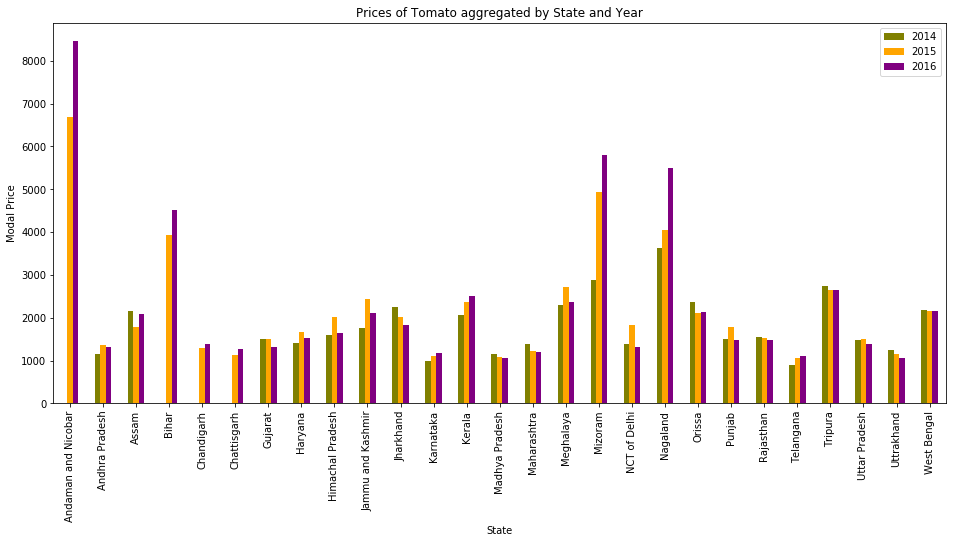

In [8]:
df_2 = df.groupby(['Year','State'])['Modal_x0020_Price'].mean().unstack(['Year']).plot(kind='bar',
                                                                                    figsize=(16,7),
                                                                                    color=['olive','orange','purple'])
plt.xlabel('State')
plt.ylabel('Modal Price')
plt.title('Prices of Tomato aggregated by State and Year')
plt.legend()
plt.show()

## Plot 2 - Prices of Tomato varying with Seasons ,State and their Varieties

The graphs show the prices of different varieties of tomatoes in every state of India throughout the four seasons. So the farmer can use the graph to choose which variety to grow for a particular state in a specific season.

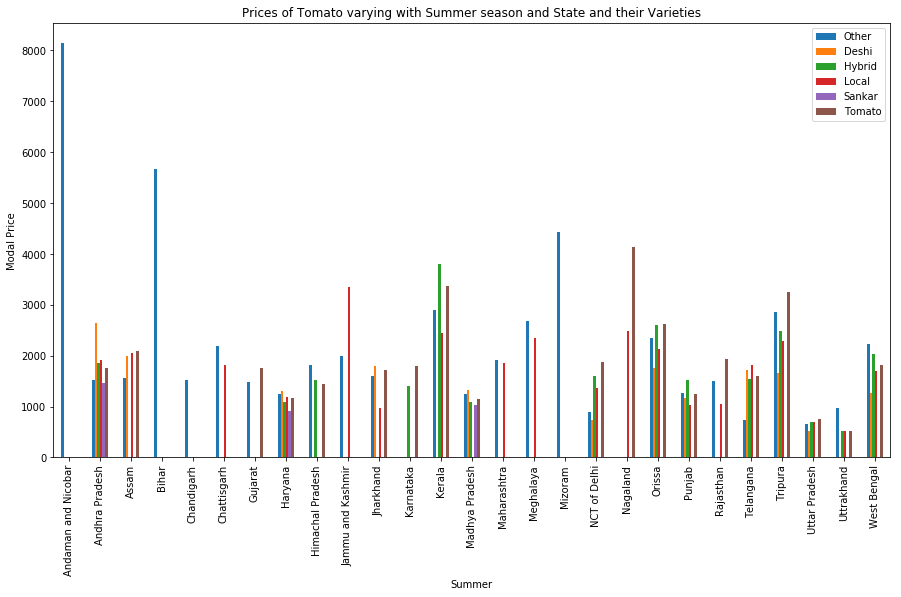

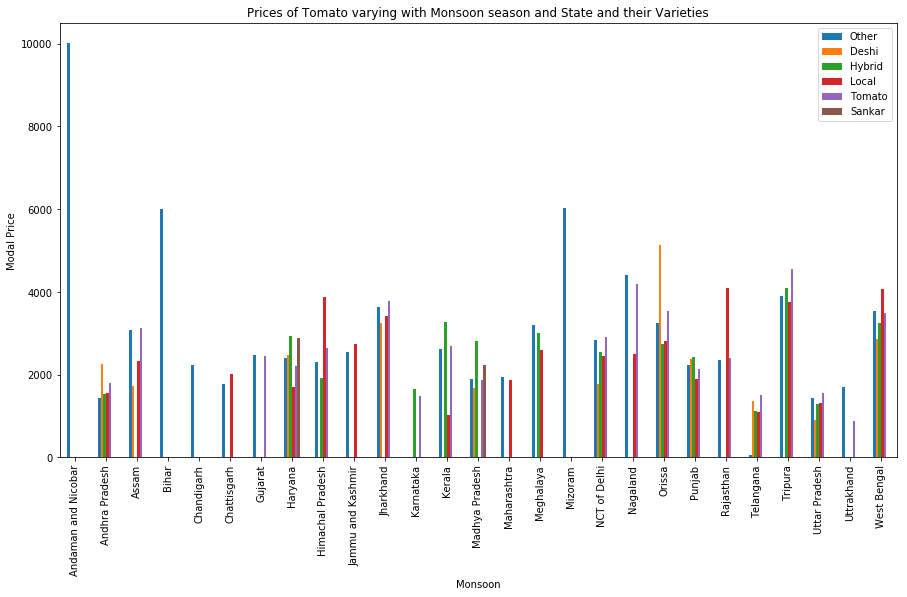

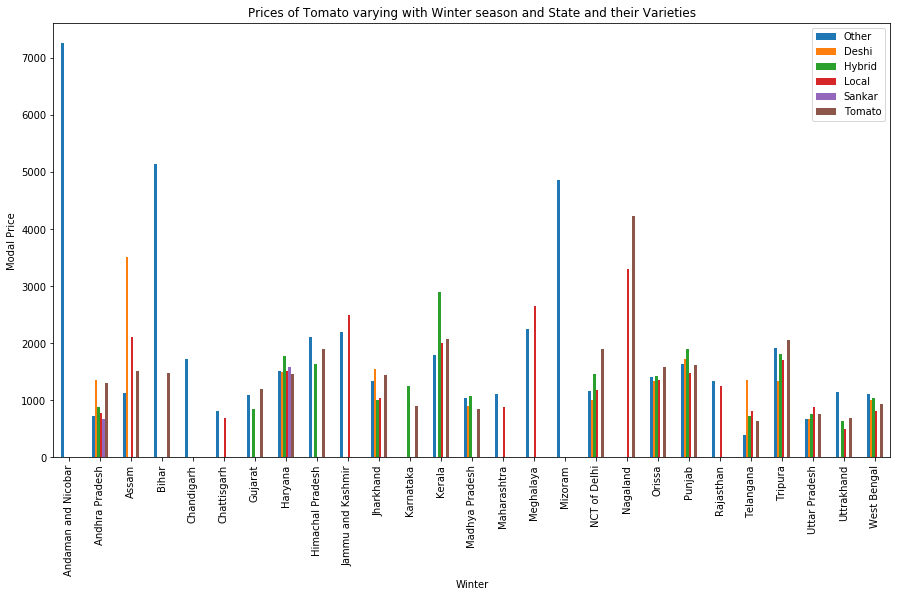

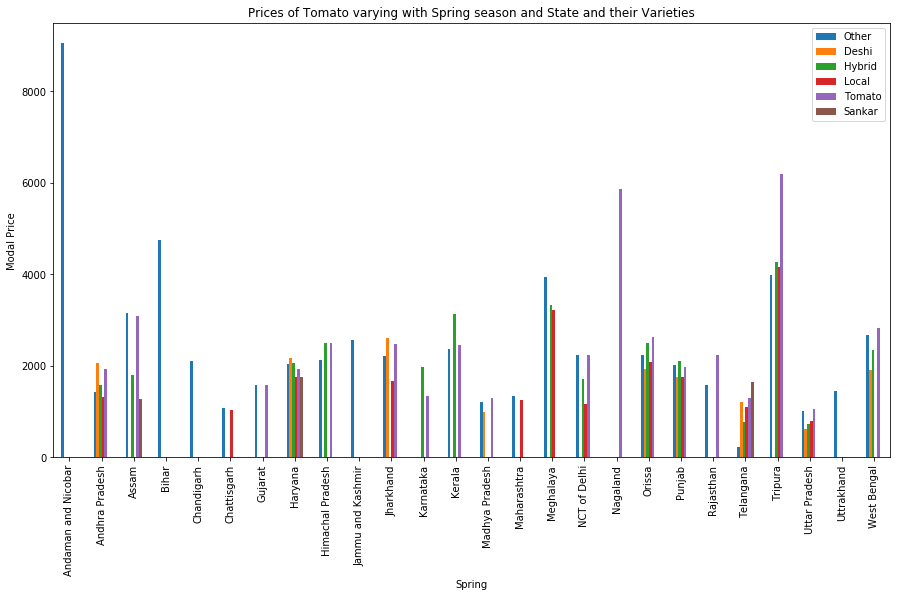

In [10]:
df_2 = df.groupby(['Season','State','Variety']).mean()
for s in ['Summer','Monsoon','Winter', 'Spring']:
    df_2.loc[s].unstack(['Variety']).plot(kind='bar', y="Max_x0020_Price", figsize=(15,8))
    plt.xlabel(s)
    plt.ylabel('Modal Price')
    plt.title(('Prices of Tomato varying with ') + s + (' season and State and their Varieties'))
    plt.legend()
    plt.show()
    print(" ")